# Movie Streaming Platform Churn Prediction - Exploratory Data Analysis (EDA)

### 0. Prerequisites

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_context("notebook")

df = pd.read_csv("churn-dataset-large.csv")
df.head()

,customer_id,gender,age,daily_watch_hours,subscription_type,profiles,genre_preference,promotions_used,tenure,region,last_login,churn
0,1FMFTGQB,Other,50,1.83,Basic,1,Action,0,4,Europe,17,0
1,FZO2N7AY,Male,48,0.88,Standard,3,Horror,0,12,North America,16,0
2,AXNBOZ10,Male,29,4.49,Basic,2,Sci-Fi,1,4,Europe,10,0
3,8DE4NEF0,Male,29,2.59,Standard,1,Comedy,0,5,South America,6,1
4,XLFU7HV8,Male,47,4.11,Standard,2,Drama,0,13,North America,4,0


### 1. Overview



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   customer_id        1000000 non-null  object 
 1   gender             1000000 non-null  object 
 2   age                1000000 non-null  int64  
 3   daily_watch_hours  1000000 non-null  float64
 4   subscription_type  1000000 non-null  object 
 5   profiles           1000000 non-null  int64  
 6   genre_preference   1000000 non-null  object 
 7   promotions_used    1000000 non-null  int64  
 8   tenure             1000000 non-null  int64  
 9   region             1000000 non-null  object 
 10  last_login         1000000 non-null  int64  
 11  churn              1000000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [3]:
df.describe(include='all')

,customer_id,gender,age,daily_watch_hours,subscription_type,profiles,genre_preference,promotions_used,tenure,region,last_login,churn
count,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000.000000
unique,1000000,3,NaN,NaN,3,NaN,8,NaN,NaN,5,NaN,NaN
top,1FMFTGQB,Male,NaN,NaN,Standard,NaN,Drama,NaN,NaN,North America,NaN,NaN
freq,1,600000,NaN,NaN,422306,NaN,213291,NaN,NaN,361810,NaN,NaN
mean,NaN,NaN,38.948458,2.349112,NaN,2.047467,NaN,0.650181,8.227408,NaN,9.468323,0.423493
std,NaN,NaN,12.633023,1.543702,NaN,1.142343,NaN,0.996727,4.831440,NaN,6.336638,0.494112
min,NaN,NaN,18.000000,0.130000,NaN,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,30.000000,1.290000,NaN,1.000000,NaN,0.000000,5.000000,NaN,5.000000,0.000000
50%,NaN,NaN,37.000000,1.910000,NaN,2.000000,NaN,0.000000,8.000000,NaN,8.000000,0.000000
75%,NaN,NaN,46.000000,2.900000,NaN,3.000000,NaN,1.000000,11.000000,NaN,13.000000,1.000000


In [4]:
df.isna().sum()

customer_id          0
gender               0
age                  0
daily_watch_hours    0
subscription_type    0
profiles             0
genre_preference     0
promotions_used      0
tenure               0
region               0
last_login           0
churn                0
dtype: int64

### 2. Variable Distributions

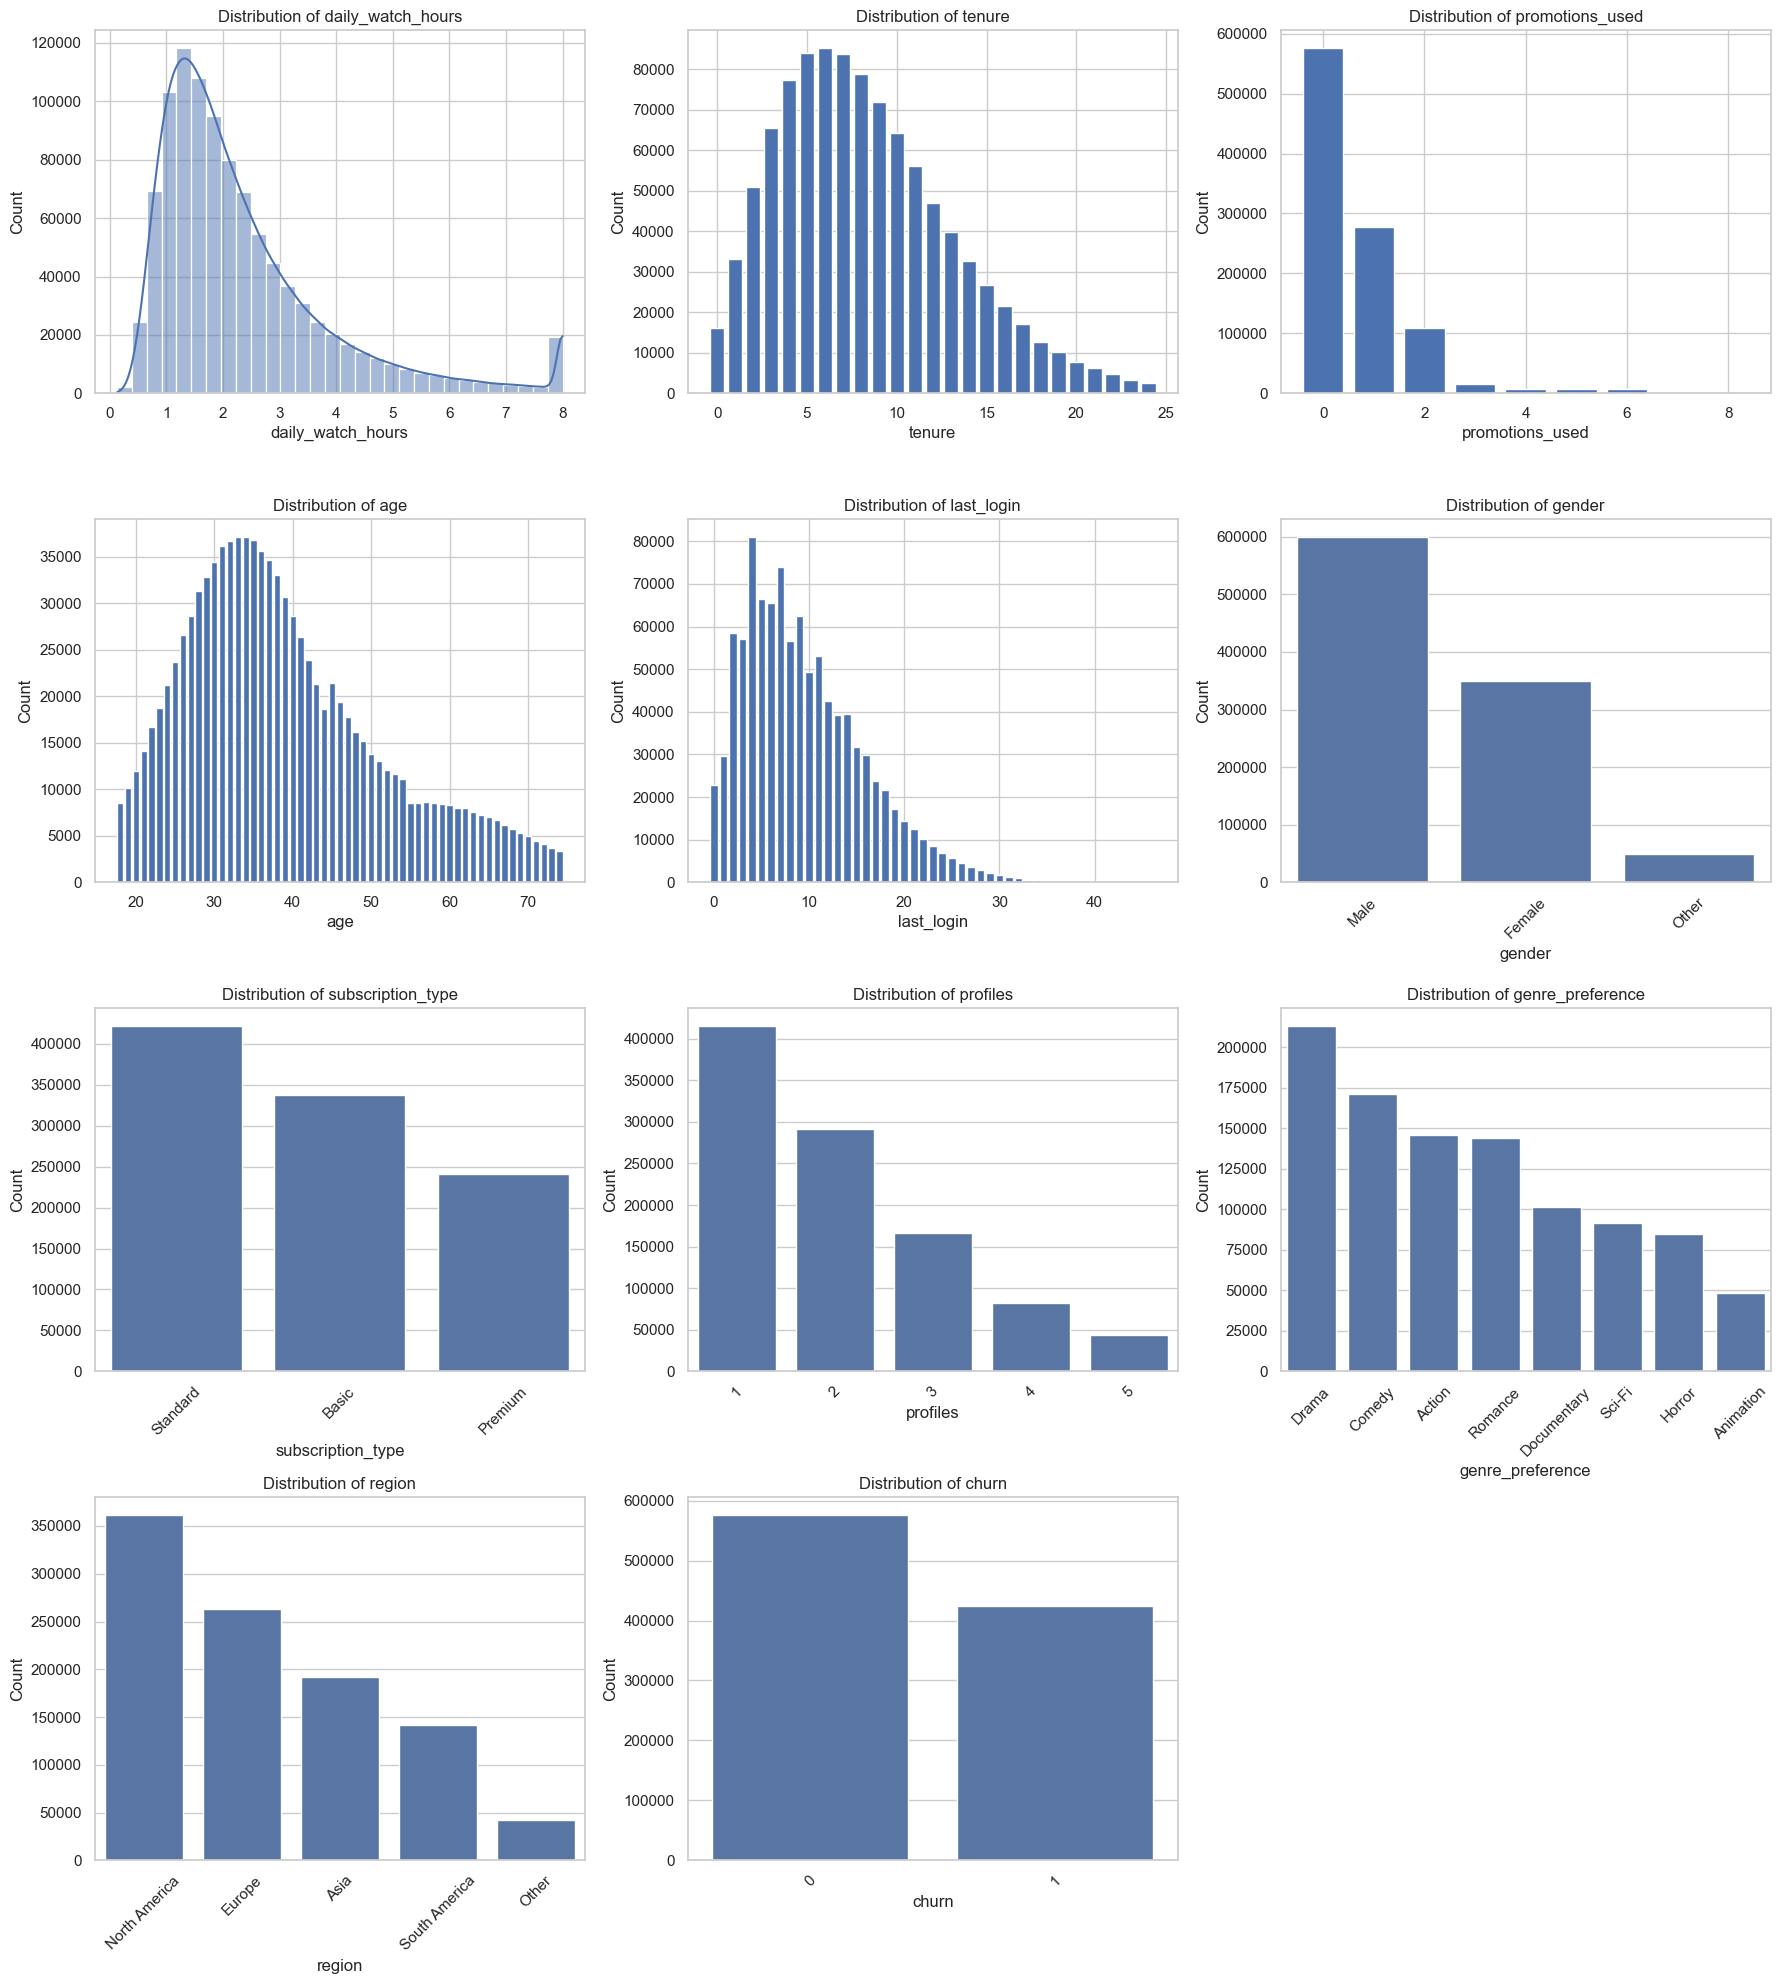

In [5]:
continuous_numeric = ['daily_watch_hours']
discrete_numeric = ['tenure', 'promotions_used', 'age', 'last_login']
categorical_features = ['gender', 'subscription_type', 'profiles', 'genre_preference', 'region', 'churn']

# Combine all features
all_features = continuous_numeric + discrete_numeric + categorical_features
n_features = len(all_features)

# Define subplot layout
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(all_features):
    plt.subplot(n_rows, n_cols, i + 1)
    
    if col in continuous_numeric:
        # Histogram for continuous numeric variables
        sns.histplot(df[col], bins=30, kde=True)
        plt.xlabel(col)
        plt.ylabel("Count")
    elif col in discrete_numeric:
        # Barplot for discrete numeric variables
        counts = df[col].value_counts().sort_index()
        plt.bar(counts.index, counts.values)
        plt.xlabel(col)
        plt.ylabel("Count")
    else:
        # Categorical variables
        sns.countplot(x=df[col], order=df[col].value_counts().index)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
    
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

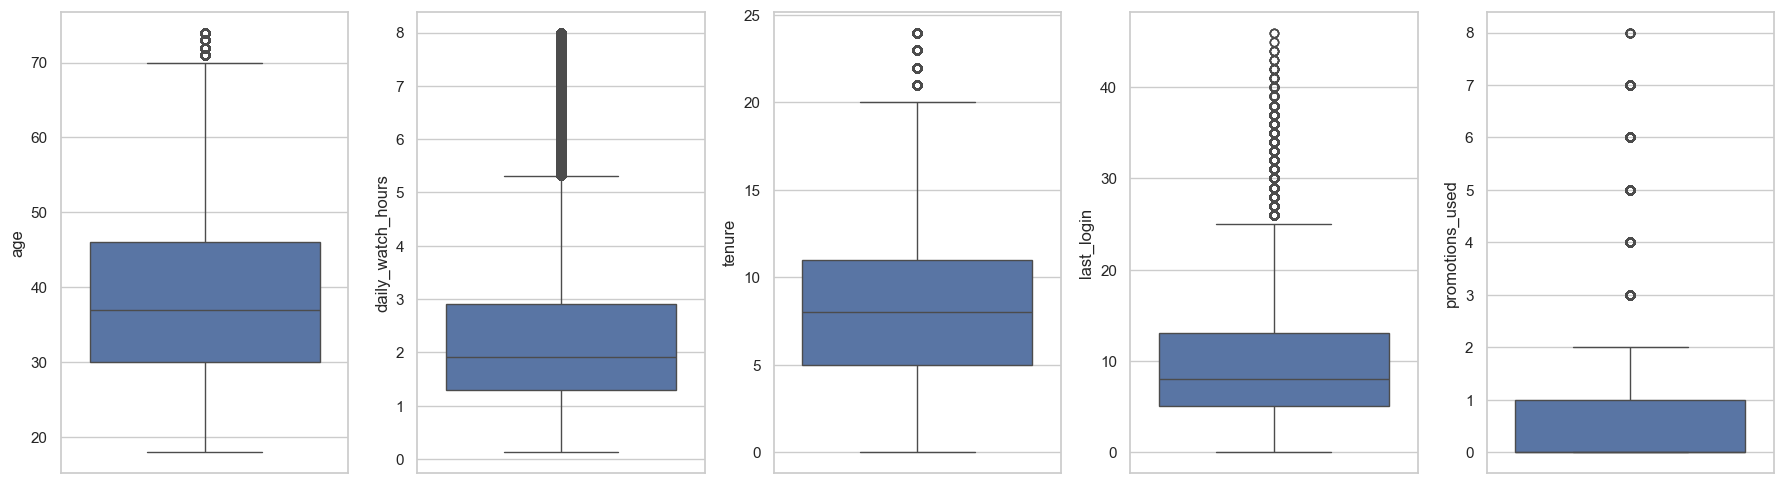

In [6]:
numeric_features = ['age', 'daily_watch_hours', 'tenure', 'last_login', 'promotions_used']

# Define subplot layout
n_cols = 5
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### 3. Churn Analysis by Feature

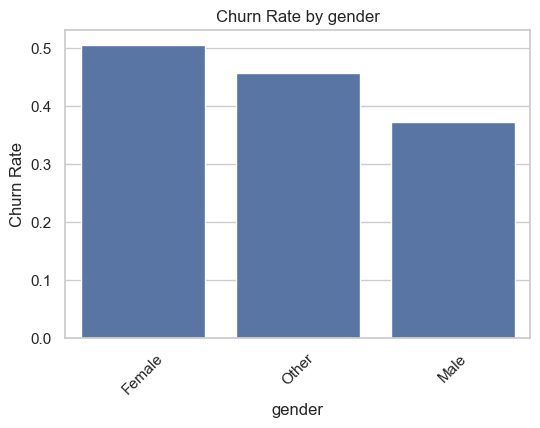

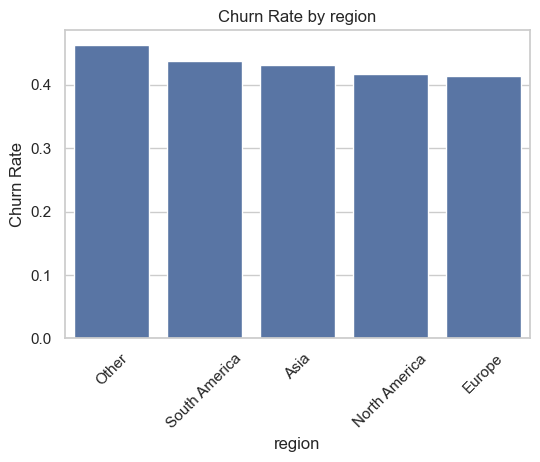

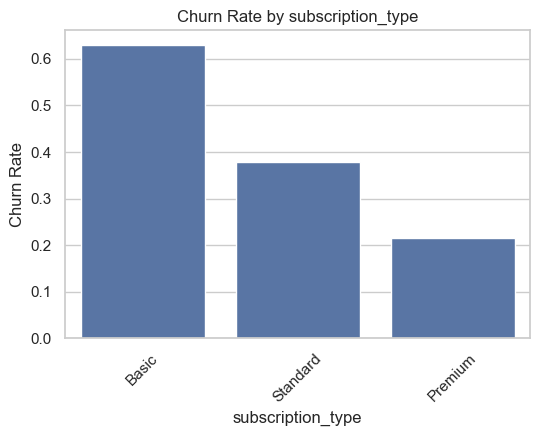

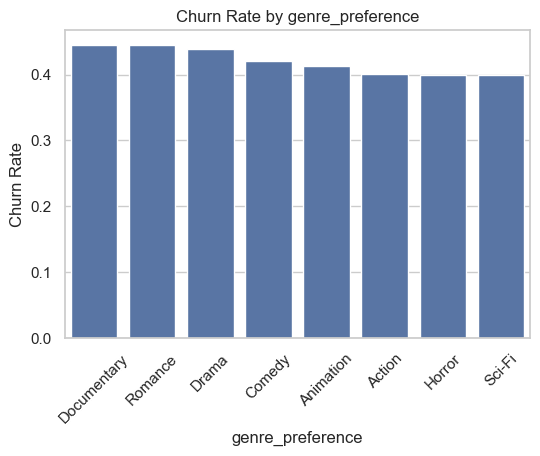

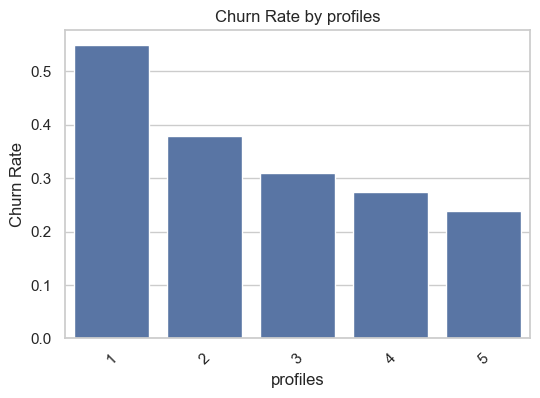

In [12]:
categorical_features = ['gender', 'region', 'subscription_type', 'genre_preference', 'profiles']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    churn_rate = df.groupby(col)['churn'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.ylabel("Churn Rate")
    plt.title(f"Churn Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()

### 4. Variable Correlation

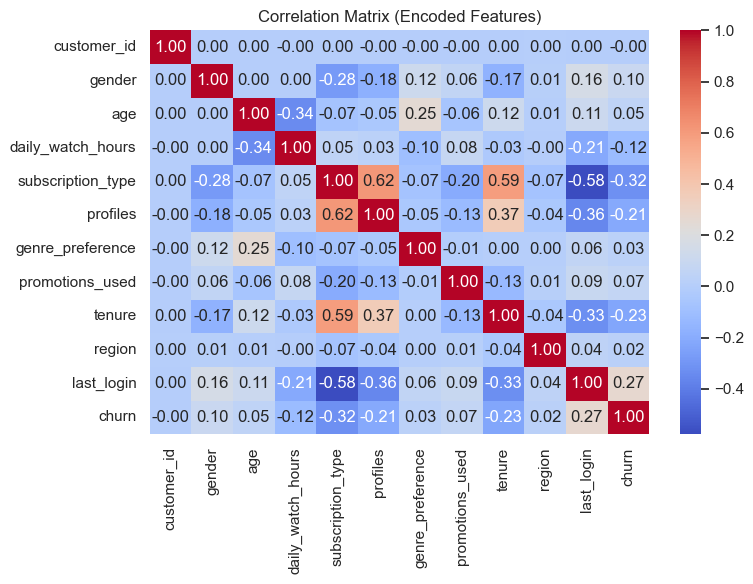

In [20]:
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

corr = df_encoded.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Encoded Features)")
plt.tight_layout()
plt.show()

### 5. Time-based Features

C:\Users\Alex\AppData\Local\Temp\ipykernel_28928\818100417.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_bin')['churn'].mean()


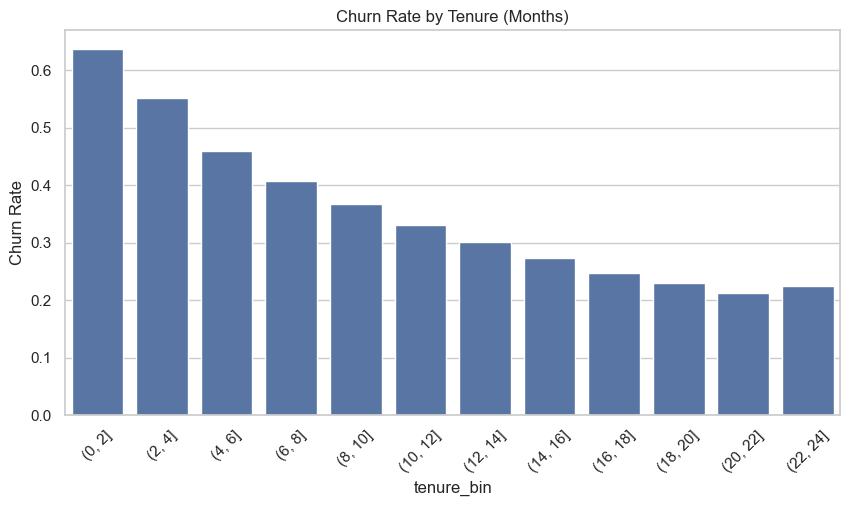

In [ ]:
bins = list(range(0, 25, 2))
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins)

tenure_churn = df.groupby('tenure_bin')['churn'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=tenure_churn.index.astype(str), y=tenure_churn.values)
plt.xticks(rotation=45)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tenure (Months)")
plt.show()

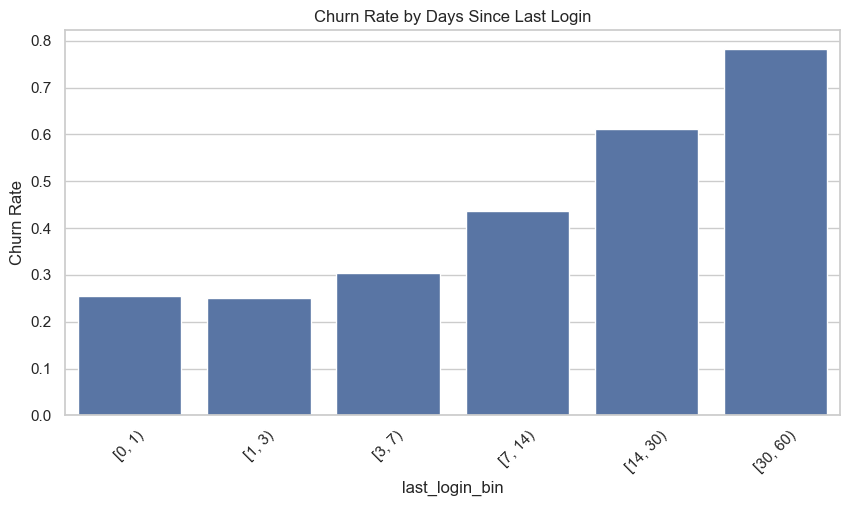

In [30]:
desired_bins = [0, 1, 3, 7, 14, 30, 60]

# Ensure the last edge is larger than the max value
max_login = df['last_login'].max()
if max_login > desired_bins[-1]:
    bins = desired_bins + [max_login + 1]  # Add a bin beyond the max
else:
    bins = desired_bins

# Cut into bins
df['last_login_bin'] = pd.cut(df['last_login'], bins=bins, right=False)

login_churn = df.groupby('last_login_bin', observed=True)['churn'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=login_churn.index.astype(str), y=login_churn.values)
plt.xticks(rotation=45)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Days Since Last Login")
plt.show()

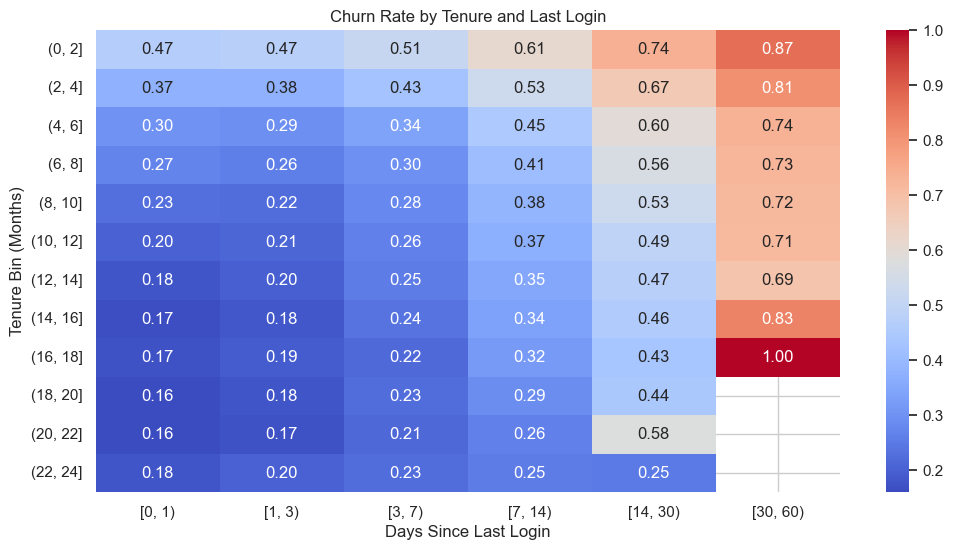

In [32]:
pivot = df.pivot_table(index='tenure_bin', columns='last_login_bin', values='churn', aggfunc='mean', observed=True)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Churn Rate by Tenure and Last Login")
plt.xlabel("Days Since Last Login")
plt.ylabel("Tenure Bin (Months)")
plt.show()